
# Regression Learning

- Data preprocessing
- Regression Algorithms
- Feature Selection
- Hyperparametetr optimization

The dataset is about Air Pollution in Skopje - Center - Macedonia

The goal is to predict the PM10 concentration using the weather-meteorological data


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


## 1. Load the Data

In [2]:
#Read dataset
data = pd.read_csv(r'Centar_PM10-group3.csv')  
data

,time,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,...,no precip,rain,sleet,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy
0,1-1-15 0:00,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,...,1,0,0,0,0,0,0,0,0,1
1,1-1-15 1:00,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,...,1,0,0,0,0,0,0,0,0,1
2,1-1-15 2:00,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,...,1,0,0,0,0,0,0,0,0,1
3,1-1-15 3:00,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,...,1,0,0,0,0,0,0,0,0,1
4,1-1-15 4:00,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12-31-15 19:00,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,...,1,0,0,0,1,0,0,0,0,0
8756,12-31-15 20:00,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,...,1,0,0,0,1,0,0,0,0,0
8757,12-31-15 21:00,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,...,1,0,0,0,1,0,0,0,0,0
8758,12-31-15 22:00,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,...,1,0,0,0,1,0,0,0,0,0


In [3]:
# data statistics
data.describe()

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,no precip,rain,sleet,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy
count,7352.000000,8759.000000,8760.000000,8759.000000,8759.000000,8737.000000,8737.000000,8618.000000,8759.000000,8759.000000,...,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000
mean,72.802447,55.270738,0.434668,43.053717,0.665269,0.000174,0.004478,1018.756200,55.927233,5.743029,...,0.978881,0.020776,0.0,0.000342,0.309703,0.0,0.042009,0.200114,0.176712,0.270434
std,82.213323,19.135721,0.387681,12.707508,0.204420,0.001894,0.032476,8.263537,18.350654,1.312911,...,0.143788,0.142643,0.0,0.018504,0.462398,0.0,0.200621,0.400108,0.381447,0.444209
min,0.270000,0.430000,0.000000,-2.210000,0.130000,0.000000,0.000000,986.110000,4.830000,0.031000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,27.627500,39.400000,0.000000,33.580000,0.520000,0.000000,0.000000,1013.137500,40.800000,6.216000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,42.680000,55.780000,0.440000,44.390000,0.700000,0.000000,0.000000,1017.860000,55.780000,6.216000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,77.680000,69.180000,0.750000,54.050000,0.830000,0.000000,0.000000,1023.550833,69.180000,6.216000,...,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,815.170000,104.870000,1.000000,69.810000,1.000000,0.097200,0.240000,1041.920000,103.810000,6.216000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [4]:
# Dataset basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 8760 non-null   object 
 1   PM10                 7352 non-null   float64
 2   apparentTemperature  8759 non-null   float64
 3   cloudCover           8760 non-null   float64
 4   dewPoint             8759 non-null   float64
 5   humidity             8759 non-null   float64
 6   precipIntensity      8737 non-null   float64
 7   precipProbability    8737 non-null   float64
 8   pressure             8618 non-null   float64
 9   temperature          8759 non-null   float64
 10  visibility           8759 non-null   float64
 11  windBearing          6658 non-null   float64
 12  windSpeed            8759 non-null   float64
 13  no precip            8760 non-null   int64  
 14  rain                 8760 non-null   int64  
 15  sleet                8760 non-null   i

# 2. Data Preprocessing

### Timestamp... 
- do you need it as feature? 
- can you extract some features from the timestamp? - If yes, extract several (hour, day, month)

* data['hour'] = pd.to_datetime(data['time']).dt.hour

Drop the time feature... it is not needed anymore

In [5]:
# Changing the datatype of 'time', from object to datetime64
data["time"] = data["time"].astype("datetime64")
 
# Setting the Date as index
data = data.set_index("time")

In [6]:
# Spliting the date info into separate columns 
data['hour'] = data.index.hour
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year

## 2.1 NULL values

Remove rows where the PM10 variable is missing or NULL

- use: data.dropna(axis=0, inplace=True, subset=['PM10'])

In [8]:
#Checking null values
data.isna().sum()

PM10                   1408
apparentTemperature       1
cloudCover                0
dewPoint                  1
humidity                  1
precipIntensity          23
precipProbability        23
pressure                142
temperature               1
visibility                1
windBearing            2102
windSpeed                 1
no precip                 0
rain                      0
sleet                     0
snow                      0
Clear                     0
Drizzle                   0
Foggy                     0
Mostly Cloudy             0
Overcast                  0
Partly Cloudy             0
hour                      0
day                       0
month                     0
year                      0
dtype: int64

In [9]:
# Drop null values in target column
data.dropna(axis=0, inplace=True, subset=['PM10'])

use functions do detect how many values are NULL
 - e.g. data.isnull().sum()

In [10]:
# Check null values again
data.isna().sum()

PM10                      0
apparentTemperature       1
cloudCover                0
dewPoint                  1
humidity                  1
precipIntensity          20
precipProbability        20
pressure                120
temperature               1
visibility                1
windBearing            1821
windSpeed                 1
no precip                 0
rain                      0
sleet                     0
snow                      0
Clear                     0
Drizzle                   0
Foggy                     0
Mostly Cloudy             0
Overcast                  0
Partly Cloudy             0
hour                      0
day                       0
month                     0
year                      0
dtype: int64

In [11]:
# Drop null values in columns where there is only 1 null value
data.dropna(axis=0, inplace=True, subset=['apparentTemperature',
                                                                 'dewPoint',
                                                                 'humidity','temperature',
                                                                 'visibility',
                                                                 'windSpeed'])

Fill the feature values that are missing or NULL.
 - e.g., data['pressure'] = data['pressure'].fillna(data['pressure'].mean())

In [12]:
# List the remaining columns with null values 
nan_cols = data.columns[data.isna().any()].tolist()
nan_cols

['precipIntensity', 'precipProbability', 'pressure', 'windBearing']

In [13]:
#Dataset info
for c in data[nan_cols]:
    print(f'\n{pd.value_counts(data[c])}')


0.0000    7199
0.0047      31
0.0024      31
0.0095      22
0.0071      15
0.0142      10
0.0118       6
0.0213       4
0.0166       4
0.0189       3
0.0332       2
0.0031       1
0.0143       1
0.0261       1
0.0237       1
0.0308       1
Name: precipIntensity, dtype: int64

0.00    7199
0.24     133
Name: precipProbability, dtype: int64

1018.420000    18
1016.090000    17
1017.600000    16
1015.820000    16
1018.190000    16
               ..
1007.966667     1
1018.906667     1
1013.416667     1
1015.570000     1
1003.266667     1
Name: pressure, Length: 4177, dtype: int64

30.0     306
20.0     243
0.0      226
41.0     193
11.0     192
        ... 
85.0       1
198.0      1
83.0       1
319.0      1
56.0       1
Name: windBearing, Length: 331, dtype: int64


In [14]:
# Checking data around null values
nan_data = data[['precipIntensity',
                         'precipProbability',
                         'pressure',
                            ]]

nan_data = nan_data[nan_data.isnull().any(axis=1)]
nan_data

,precipIntensity,precipProbability,pressure
time,,,
2015-01-02 05:00:00,NaN,NaN,1037.626667
2015-01-02 07:00:00,0.0,0.0,NaN
2015-01-02 08:00:00,0.0,0.0,NaN
2015-01-05 03:00:00,NaN,NaN,1023.600000
2015-01-07 04:00:00,0.0,0.0,NaN
...,...,...,...
2015-11-12 05:00:00,NaN,NaN,1027.743333
2015-11-21 11:00:00,NaN,NaN,1000.980000
2015-11-21 12:00:00,NaN,NaN,999.860000


In [15]:
# Filling 'precipIntensity' and 'precipProbability' with the most common value
data['precipIntensity'] = data['precipIntensity'].fillna(0)
data['precipProbability'] = data['precipProbability'].fillna(0)

In [16]:
# Checking the months in which 'windBearing' has null values
d_pressure = data.drop('windBearing', axis=1)
null_pressure = d_pressure[d_pressure.isnull().any(axis=1)]
null_pressure['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11], dtype=int64)

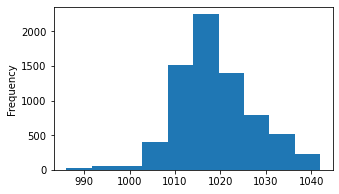

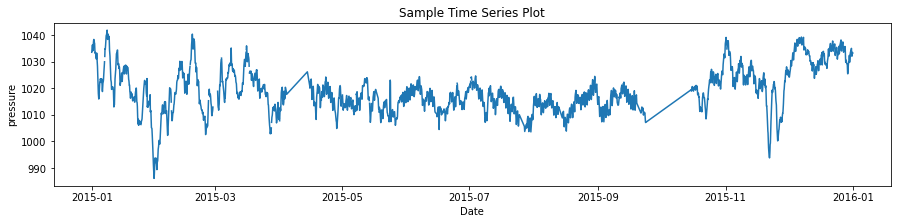

In [17]:
# "pressure" distribution 

#hystogram
plt.figure(figsize=(5,3))
data['pressure'].plot.hist()

# "pressure" over time
plt.figure(figsize=(15, 3))
plt.xlabel("Date")
plt.ylabel("pressure")
plt.title("Sample Time Series Plot")
plt.plot(data["pressure"])

In [18]:
# 'Pressure' mean value
data['pressure'].mean()

1018.8821551211788

In [19]:
# Filna with random values function
def fillNaN_with_unifrand(df):
    a = df.values
    m = np.isnan(a) # mask of NaNs
    N = df.dropna().values
    mi, ma = np.percentile(N, 25), np.percentile(N, 75)
    a[m] = np.random.randint(mi, ma, size=m.sum())
    return df

In [20]:
#Filling 'pressure' missing values with random values in range of its 25th and 75th percentile
data['pressure'] = fillNaN_with_unifrand(data['pressure'])

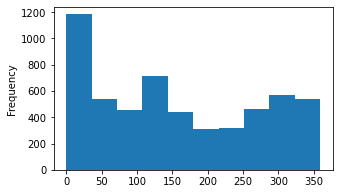

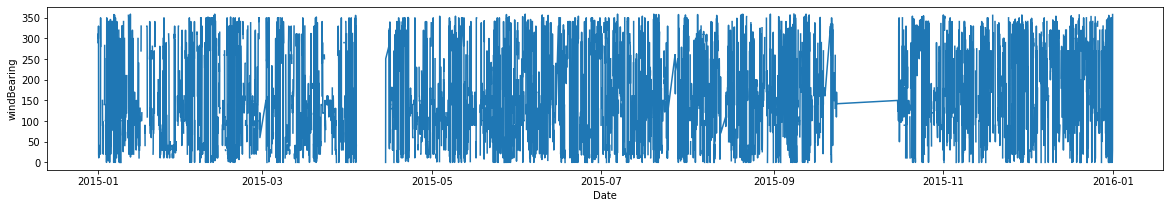

In [21]:
# "windBearing" distribution 

#hystogram
plt.figure(figsize=(5,3))
data['windBearing'].plot.hist()

# "windBearing" over time
plt.figure(figsize=(20, 3))
plt.xlabel("Date")
plt.ylabel("windBearing")
plt.plot(data["windBearing"])


In [22]:
# 'windBearing' mean value
data['windBearing'].mean()

156.97179533538238

In [23]:
#Filling 'windBearing' missing values with random values in range of its 25th and 75th percentile
data['windBearing'] = fillNaN_with_unifrand(data['windBearing'])

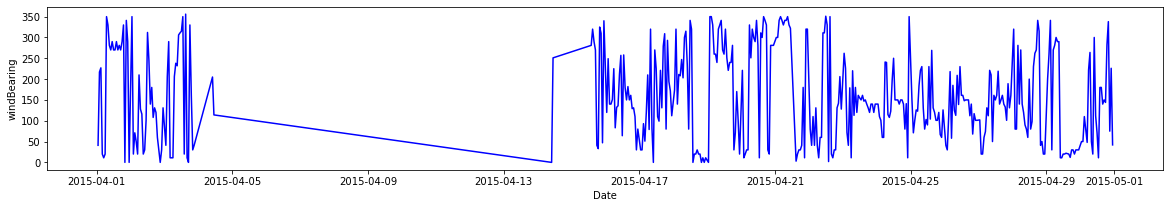

In [24]:
# Vizualize 'windBearing' where its null values are replaced
plt.figure(figsize=(20, 3))
plt.xlabel("Date")
plt.ylabel("windBearing")
y6 = data[data['month'] == 4] ['windBearing']
plt.plot(y6, 'b')

In [25]:
# Checking null values left
data.isna().sum()

PM10                   0
apparentTemperature    0
cloudCover             0
dewPoint               0
humidity               0
precipIntensity        0
precipProbability      0
pressure               0
temperature            0
visibility             0
windBearing            0
windSpeed              0
no precip              0
rain                   0
sleet                  0
snow                   0
Clear                  0
Drizzle                0
Foggy                  0
Mostly Cloudy          0
Overcast               0
Partly Cloudy          0
hour                   0
day                    0
month                  0
year                   0
dtype: int64

## 2.2 Standardize the train and test features. Use StandardScaler
<br><b> do not standardize the target variable!

In [26]:
# get the target variable... create X and y
y = pd.DataFrame(data.iloc[:,0])
X = data.drop(['PM10'], axis=1)

In [27]:
y

,PM10
time,
2015-01-01 00:00:00,30.020000
2015-01-01 01:00:00,30.210000
2015-01-01 02:00:00,29.400000
2015-01-01 03:00:00,28.830000
2015-01-01 04:00:00,27.690000
...,...
2015-12-31 19:00:00,51.040000
2015-12-31 20:00:00,59.000000
2015-12-31 21:00:00,72.295000


In [28]:
X.columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'precipIntensity', 'precipProbability', 'pressure', 'temperature',
       'visibility', 'windBearing', 'windSpeed', 'no precip', 'rain', 'sleet',
       'snow', 'Clear', 'Drizzle', 'Foggy', 'Mostly Cloudy', 'Overcast',
       'Partly Cloudy', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [29]:
from sklearn.preprocessing import scale

columns = ['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'precipIntensity', 'precipProbability', 'pressure', 'temperature',
       'visibility', 'windBearing', 'windSpeed', 'no precip', 'rain', 'sleet',
       'snow', 'Clear', 'Drizzle', 'Foggy', 'Mostly Cloudy', 'Overcast',
       'Partly Cloudy']
X[columns] = scale(X[columns])

In [30]:
X.describe()

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,...,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month,year
count,7.351000e+03,7.351000e+03,7.351000e+03,7.351000e+03,7.351000e+03,7.351000e+03,7.351000e+03,7.351000e+03,7.351000e+03,7.351000e+03,...,7.351000e+03,7351.0,7.351000e+03,7.351000e+03,7.351000e+03,7.351000e+03,7351.000000,7351.000000,7351.000000,7351.0
mean,-5.290890e-16,-2.108684e-15,3.449530e-16,1.799162e-15,5.595756e-15,-8.302795e-15,4.091892e-15,5.267329e-16,-1.534304e-14,2.666136e-16,...,2.819855e-15,0.0,2.131942e-16,1.042012e-14,5.393485e-15,-2.976292e-15,11.795130,15.929125,6.318732,2015.0
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,...,1.000068e+00,0.0,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,6.754545,8.790208,3.529048,0.0
min,-2.724471e+00,-1.083045e+00,-3.451396e+00,-2.553100e+00,-1.071772e-01,-1.357430e-01,-3.906449e+00,-2.647240e+00,-4.156059e+00,-1.496208e+00,...,-6.906476e-01,0.0,-2.205556e-01,-4.773122e-01,-4.508953e-01,-6.159816e-01,0.000000,1.000000,1.000000,2015.0
25%,-8.120116e-01,-1.083045e+00,-7.458389e-01,-7.215600e-01,-1.071772e-01,-1.357430e-01,-6.505661e-01,-8.375163e-01,3.764246e-01,-8.722421e-01,...,-6.906476e-01,0.0,-2.205556e-01,-4.773122e-01,-4.508953e-01,-6.159816e-01,6.000000,8.000000,3.000000,2015.0
50%,-6.505539e-02,-7.712907e-02,4.493246e-02,1.460115e-01,-1.071772e-01,-1.357430e-01,-1.154723e-01,-1.051460e-01,3.764246e-01,-1.522818e-01,...,-6.906476e-01,0.0,-2.205556e-01,-4.773122e-01,-4.508953e-01,-6.159816e-01,12.000000,16.000000,6.000000,2015.0
75%,7.514493e-01,8.514092e-01,8.830880e-01,8.207893e-01,-1.071772e-01,-1.357430e-01,5.539912e-01,7.439638e-01,3.764246e-01,8.604625e-01,...,1.447916e+00,0.0,-2.205556e-01,-4.773122e-01,-4.508953e-01,1.623425e+00,18.000000,23.000000,9.000000,2015.0
max,2.520041e+00,1.496227e+00,2.143040e+00,1.640162e+00,2.322432e+01,7.366863e+00,2.749625e+00,2.534319e+00,3.764246e-01,1.950002e+00,...,1.447916e+00,0.0,4.534003e+00,2.095065e+00,2.217810e+00,1.623425e+00,23.000000,31.000000,12.000000,2015.0


## 2.3 Correlation Matrix

Plot the Correlation Matrix between all the features including the target variable.
 - Which feature is the most correlated with the target variable?
 - Which features are the most correlated between each other?

<AxesSubplot:>

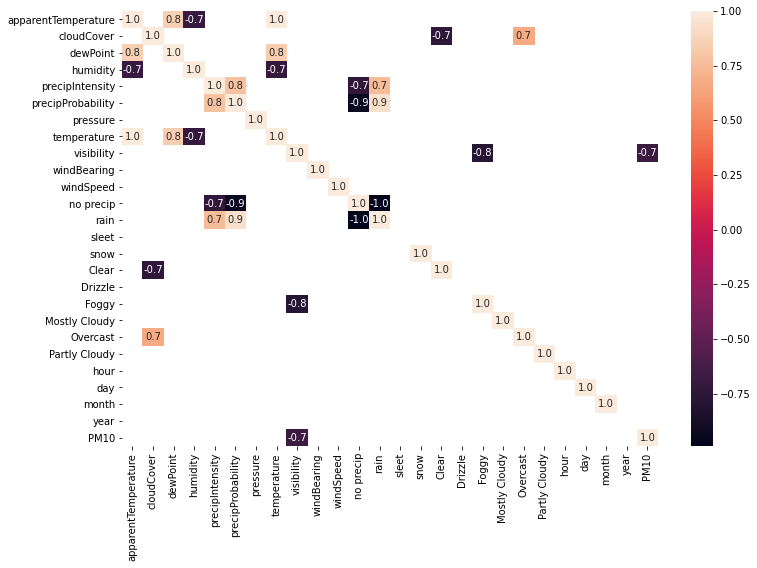

In [31]:
#Most correlated features
result = pd.concat([X, y], axis=1)
corr = result.corr()

kot = corr[(corr>=.6) | (corr<=-.6)]
plt.figure(figsize=(12,8))
sns.heatmap(kot, annot=True, fmt='.1f')

Visibility is the most correlated with the target variable.
Highest correlation between variables:
* 'apparentTemperature'/'temperature' with 'dewPoint', 'humidity' and 'pressure'
* 'cloudCover' with 'Clear' and 'Overcast'
* 'precipIntensity'/'precipProbability' with 'no precip' and 'rain'
* 'visibility' with 'Foggy'

## 2.4 Split the data 

Set the random_state=1

In [32]:
#split the data, 70% train and 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## 3 Default Regressor

Create regressors with default parameters:
- Linear Regression
- LASSO regression (try if you want)
- Random Forest
- XGBoost (try if you want)
- SVR
- KNN
- Dummy regressor

Compare the MAE values in a table

In [34]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import xgboost as XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [35]:
%%time

# Create regression objects
lin = linear_model.LinearRegression()
lasso = linear_model.Lasso()
rf =  RandomForestRegressor(random_state=1)
gbr = GradientBoostingRegressor()
svr = SVR() 
knn = KNeighborsRegressor() 
dummy_regr = DummyRegressor(strategy="mean")

# Train the models
lin.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)
svr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dummy_regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lin = lin.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_dummy = dummy_regr.predict(X_test)

Wall time: 1min 48s


In [36]:
#Metrics
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

mae_dummy = mean_absolute_error(y_test, y_dummy)
mse_dummy = mean_squared_error(y_test, y_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_dummy))
r2_dummy = r2_score(y_test, y_dummy)

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae_lin,mse_lin,rmse_lin,r2_lin],
        'LASSO Regression': [mae_lasso,mse_lasso,rmse_lasso,r2_lasso],
        'Random Forest Regression': [mae_rf,mse_rf,rmse_rf,r2_rf],
        'Gradient Boosting Regression': [mae_gbr,mse_gbr,rmse_gbr,r2_gbr],
        'SVR Regression': [mae_svr,mse_svr,rmse_svr,r2_svr],
        'KNN Regression': [mae_knn,mse_knn,rmse_knn,r2_knn],
        'Dummy': [mae_dummy,mse_dummy,rmse_dummy,r2_dummy],
        }

comparison = pd.DataFrame (data, columns = ['Metric', 'Linear Regression', 'LASSO Regression', 
                                            'Random Forest Regression', 'Gradient Boosting Regression', 
                                            'SVR Regression', 'KNN Regression',
                                            'Dummy'])
comparison

,Metric,Linear Regression,LASSO Regression,Random Forest Regression,Gradient Boosting Regression,SVR Regression,KNN Regression,Dummy
0,MAE,33.653411,33.531399,16.935008,23.644195,45.014143,22.528762,54.353344
1,MSE,2731.983402,2787.953360,921.086310,1469.739793,7352.116157,1689.953105,6494.855184
2,RMSE,52.268379,52.801073,30.349404,38.337186,85.744482,41.109039,80.590664
3,R2,0.579277,0.570658,0.858154,0.773662,-0.132219,0.739749,-0.000201


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

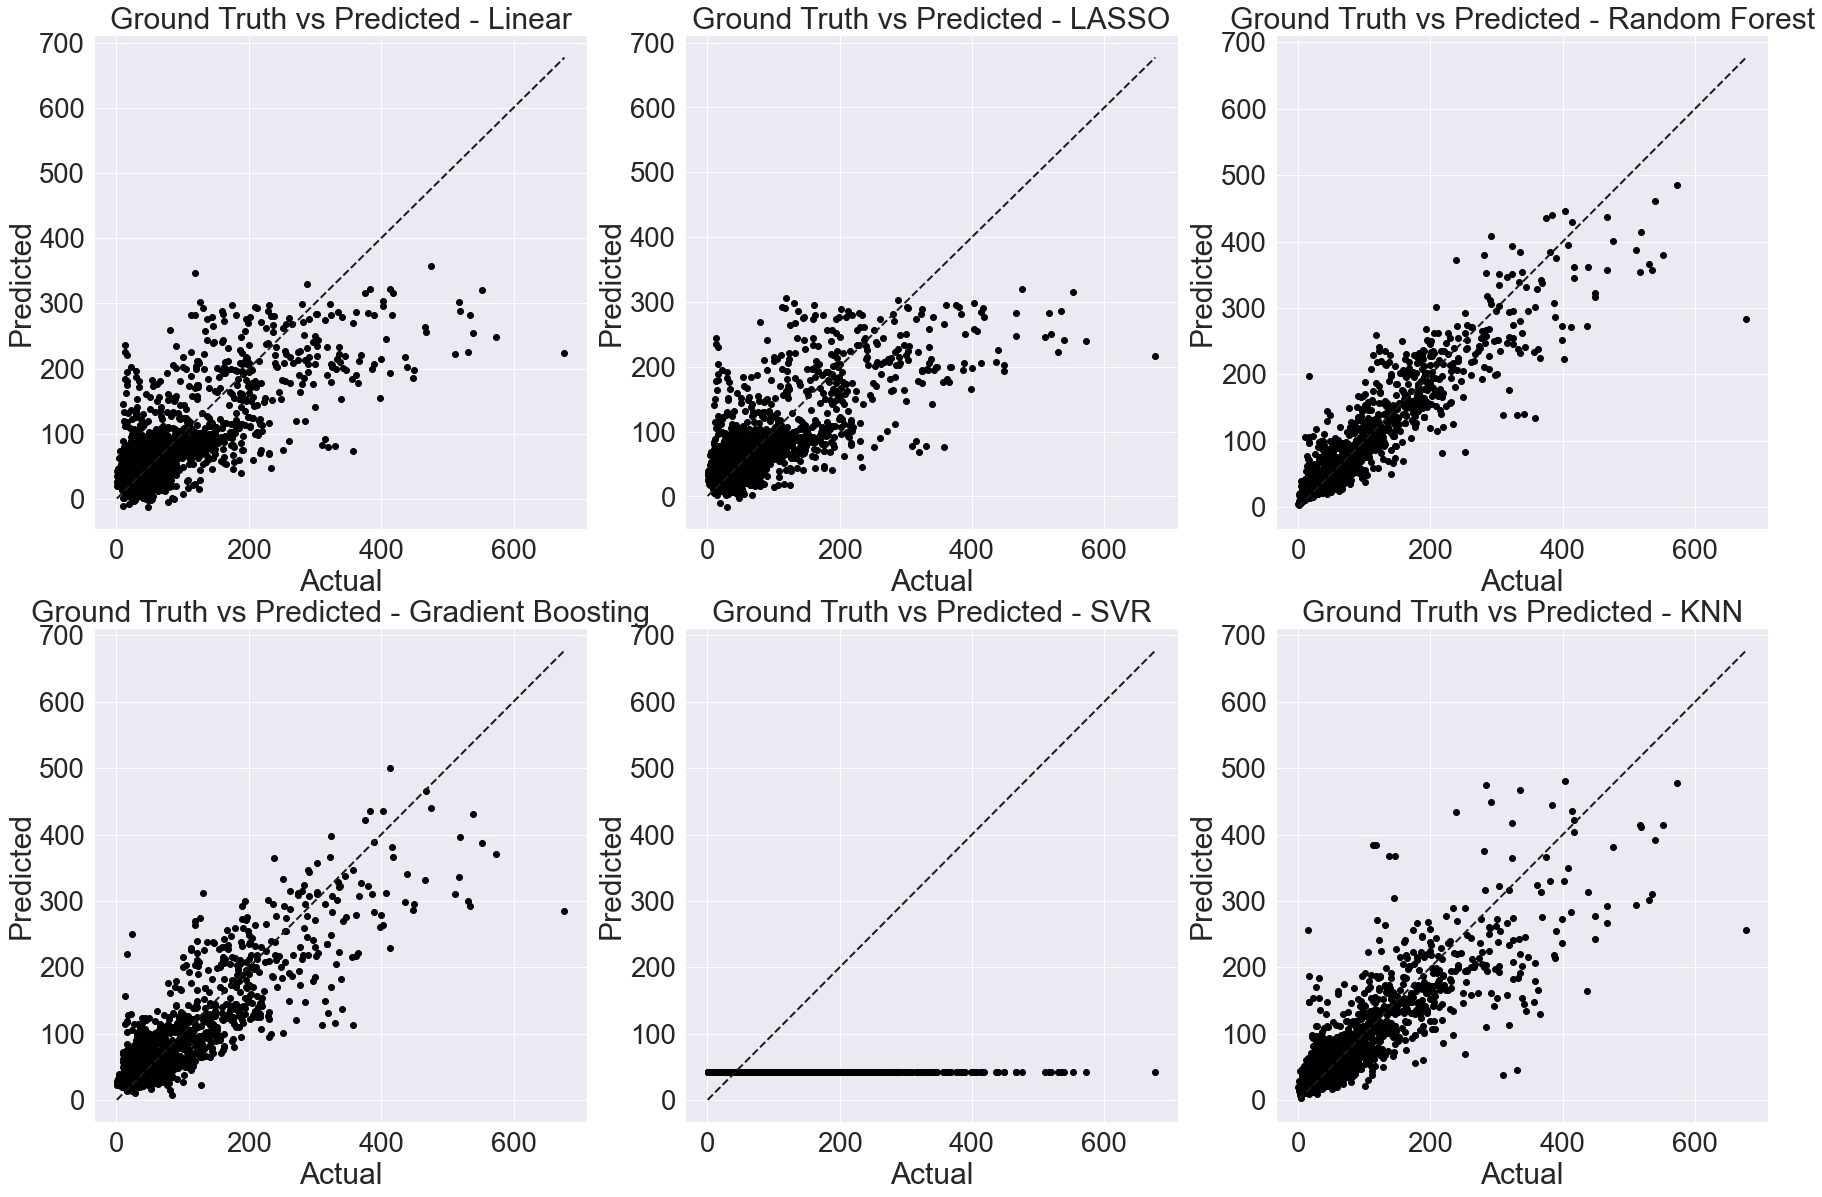

In [37]:
#Predicted values visualization
sns.set(font_scale=2.5)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30,20))

ax1.scatter(y_test, y_pred_lin, color='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Ground Truth vs Predicted - Linear')
ax1.set(xlabel='Actual', ylabel='Predicted')

ax2.scatter(y_test, y_pred_lasso, color='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ground Truth vs Predicted - LASSO')
ax2.set(xlabel='Actual', ylabel='Predicted')

ax3.scatter(y_test, y_pred_rf, color='black')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_title('Ground Truth vs Predicted - Random Forest')
ax3.set(xlabel='Actual', ylabel='Predicted')

ax4.scatter(y_test, y_pred_gbr, color='black')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_title('Ground Truth vs Predicted - Gradient Boosting')
ax4.set(xlabel='Actual', ylabel='Predicted')

ax5.scatter(y_test, y_pred_svr, color='black')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax5.set_title('Ground Truth vs Predicted - SVR')
ax5.set(xlabel='Actual', ylabel='Predicted')

ax6.scatter(y_test, y_pred_knn, color='black')
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax6.set_title('Ground Truth vs Predicted - KNN')
ax6.set(xlabel='Actual', ylabel='Predicted')


#### Comments:
Random Forest Regression is the model that provides highest accuraccy of the predicted values and the lowest MAE.

It is followed by Gradient Boosting Regression model.

Linear and LASSO Regression models mainly fail to predic the highest and the lowest values. 

Default parameters of SVR Regrossor behave as Dummy regressor.

## 3. Feature Selection

Use SelectKBest feature selection technique.
Reduce the number of features to 15

In [38]:
rf_imp = rf.feature_importances_
gbr_imp = gbr.feature_importances_

imp_f = pd.DataFrame() 
imp_f['Feature'] = X_train.columns
imp_f['RF_importance'] = rf_imp
imp_f['GBR_importance'] = gbr_imp

imp_f.sort_values('RF_importance', ascending=False)


,Feature,RF_importance,GBR_importance
8,visibility,0.465638,0.562233
6,pressure,0.102418,0.050467
2,dewPoint,0.091124,0.068443
23,month,0.070786,0.139630
22,day,0.059061,0.035499
21,hour,0.045421,0.019456
19,Overcast,0.036939,0.046609
10,windSpeed,0.024330,0.018837
1,cloudCover,0.022647,0.019686
9,windBearing,0.022570,0.005316


In [39]:
# Feature Selection with Univariate Statistical Tests
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions

# feature selection, top 7 features
test = SelectKBest(score_func=f_regression, k=15)
training = test.fit(X_train, y_train)

# summarize scores
set_printoptions(precision=3)
# print(training.scores_)
X_Best = training.transform(X_train)
# summarize selected features
# print(X_Best[0:7])

#get also the feature names
cols = test.get_support(indices=True)
X_Best = X_train.iloc[:,cols]
print ("Best Features", cols)

best_f = pd.DataFrame() 
best_f['Feature'] = X_train.columns
best_f['score'] = training.scores_

best_f.sort_values('score', ascending=False)

Best Features [ 0  2  3  4  5  6  7  8 10 15 17 18 19 20 23]


,Feature,score
8,visibility,4422.671787
17,Foggy,1740.870306
7,temperature,1314.196945
0,apparentTemperature,1153.866537
6,pressure,981.491604
2,dewPoint,926.003420
3,humidity,729.440432
10,windSpeed,367.152407
20,Partly Cloudy,97.459202
19,Overcast,96.469203


In [40]:
RF = [8, 6, 2, 23, 22, 21, 19, 10, 1, 9, 3, 0, 7, 15, 18] #, 20, 17, 11, 4, 12, 5, 14, 16, 13, 24")
Best = [8, 17, 7, 0, 6, 2, 3, 10, 20, 19, 23, 15, 18, 5, 4] #, 1, 22, 12, 11, 9, 21, 14, 13, 16, 24")

#Finding common columns between the 15 best RF and SelectKBest importance scores
RF_set = set(RF)
Best_set = set(Best)
intersection = RF_set. intersection(Best) #Find common elements of set and list.
intersection_as_list = list(intersection)
print(intersection_as_list)

#Finding non-common columns between the 15 best RF and SelectKBest importance scores
differenceBest = Best_set.difference(RF_set)
differenceBest_as_list = list(differenceBest)
print(differenceBest_as_list)
differenceRF = RF_set.difference(Best_set)
differenceRF_as_list = list(differenceRF)
print(differenceRF_as_list)


X_intersec = X_train.iloc[:,intersection_as_list]
print("X_intersec", X_intersec.columns)
X_diff_Best = X_train.iloc[:,differenceBest_as_list]
print("X_diff_Best", X_diff_Best.columns)
X_diff_RF = X_train.iloc[:,differenceRF_as_list]
print("X_diff_Best", X_diff_RF.columns)

[0, 2, 3, 6, 7, 8, 10, 15, 18, 19, 23]
[17, 20, 4, 5]
[1, 21, 9, 22]
X_intersec Index(['apparentTemperature', 'dewPoint', 'humidity', 'pressure',
       'temperature', 'visibility', 'windSpeed', 'Clear', 'Mostly Cloudy',
       'Overcast', 'month'],
      dtype='object')
X_diff_Best Index(['Foggy', 'Partly Cloudy', 'precipIntensity', 'precipProbability'], dtype='object')
X_diff_Best Index(['cloudCover', 'hour', 'windBearing', 'day'], dtype='object')


#### Comments:
There are 11 common features, between the features selected according to the k highest scores (SelectKBest) and the most important for RandomForest model (since it has given the best predictions). Those are:
* 'apparentTemperature', 
* 'dewPoint', 
* 'humidity', 
* 'pressure',
* 'temperature', 
* 'visibility', 
* 'windSpeed', 
* 'Clear', 
* 'Mostly Cloudy',
* 'Overcast', 
* 'month'

Among the best 15 according to both criteria (SelectKBest and features_importance) are also:
* 'Foggy', 
* 'Partly Cloudy',
* 'hour',
* 'day'

That's why these 15 features are selected as the best.


In [41]:
#The Best 15 columns - based on the best RF and SelectKBest importance scores
Best15 = [0, 2, 3, 6, 7, 8, 10, 15, 18, 19, 23, 17, 20, 21, 22]
Best15.sort()

X_new = X_train.iloc[:,Best15]
X_new.columns

Index(['apparentTemperature', 'dewPoint', 'humidity', 'pressure',
       'temperature', 'visibility', 'windSpeed', 'Clear', 'Foggy',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'hour', 'day', 'month'],
      dtype='object')

Create new regressors with default parameters with the selected 15 features:
- Linear Regression
- LASSO regression
- Random Forest
- XGBoost (try if you want)
- SVR
- KNN
- Dummy regressor

Compare the MAE values in a table

In [42]:
X_test_new = X_test[X_new.columns]

In [43]:
%%time

# Create regression objects
Nlin = linear_model.LinearRegression()
Nlasso = linear_model.Lasso()
Nrf =  RandomForestRegressor(random_state=1)
Ngbr = GradientBoostingRegressor()
Nsvr = SVR() 
Nknn = KNeighborsRegressor() 
Ndummy_regr = DummyRegressor(strategy="mean")

# Train the models
Nlin.fit(X_new, y_train)
Nlasso.fit(X_new, y_train)
Nrf.fit(X_new, y_train)
Ngbr.fit(X_new, y_train)
Nsvr.fit(X_new, y_train)
Nknn.fit(X_new, y_train)
Ndummy_regr.fit(X_new, y_train)

# Make predictions using the testing set
y_pred_lin = Nlin.predict(X_test_new)
y_pred_lasso = Nlasso.predict(X_test_new)
y_pred_rf = Nrf.predict(X_test_new)
y_pred_gbr = Ngbr.predict(X_test_new)
y_pred_svr = Nsvr.predict(X_test_new)
y_pred_knn = Nknn.predict(X_test_new)
y_dummy = Ndummy_regr.predict(X_test_new)

Wall time: 1min 24s


In [44]:
#Metrics
mae_new_lin = mean_absolute_error(y_test, y_pred_lin)
mse_new_lin = mean_squared_error(y_test, y_pred_lin)
rmse_new_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_new_lin = r2_score(y_test, y_pred_lin)

mae_new_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_new_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_new_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_new_lasso = r2_score(y_test, y_pred_lasso)

mae_new_rf = mean_absolute_error(y_test, y_pred_rf)
mse_new_rf = mean_squared_error(y_test, y_pred_rf)
rmse_new_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_new_rf = r2_score(y_test, y_pred_rf)

mae_new_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_new_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_new_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_new_gbr = r2_score(y_test, y_pred_gbr)

mae_new_svr = mean_absolute_error(y_test, y_pred_svr)
mse_new_svr = mean_squared_error(y_test, y_pred_svr)
rmse_new_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_new_svr = r2_score(y_test, y_pred_svr)

mae_new_knn = mean_absolute_error(y_test, y_pred_knn)
mse_new_knn = mean_squared_error(y_test, y_pred_knn)
rmse_new_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_new_knn = r2_score(y_test, y_pred_knn)

mae_new_dummy = mean_absolute_error(y_test, y_dummy)
mse_new_dummy = mean_squared_error(y_test, y_dummy)
rmse_new_dummy = np.sqrt(mean_squared_error(y_test, y_dummy))
r2_new_dummy = r2_score(y_test, y_dummy)

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae_new_lin,mse_new_lin,rmse_new_lin,r2_new_lin],
        'LASSO Regression': [mae_new_lasso,mse_new_lasso,rmse_new_lasso,r2_new_lasso],
        'Random Forest Regression': [mae_new_rf,mse_new_rf,rmse_new_rf,r2_new_rf],
        'Gradient Boosting Regression': [mae_new_gbr,mse_new_gbr,rmse_new_gbr,r2_new_gbr],
        'SVR Regression': [mae_new_svr,mse_new_svr,rmse_new_svr,r2_new_svr],
        'KNN Regression': [mae_new_knn,mse_new_knn,rmse_new_knn,r2_new_knn],
        'Dummy': [mae_new_dummy,mse_new_dummy,rmse_new_dummy,r2_new_dummy],
        }

comparison = pd.DataFrame (data, columns = ['Metric', 'Linear Regression', 'LASSO Regression', 
                                            'Random Forest Regression', 'Gradient Boosting Regression', 
                                            'SVR Regression', 'KNN Regression',
                                            'Dummy'])
comparison


,Metric,Linear Regression,LASSO Regression,Random Forest Regression,Gradient Boosting Regression,SVR Regression,KNN Regression,Dummy
0,MAE,33.688951,33.701894,16.657883,23.461343,38.899227,21.951473,54.353344
1,MSE,2785.501357,2835.828728,934.986056,1424.389913,5644.674950,1636.577327,6494.855184
2,RMSE,52.777849,53.252500,30.577542,37.741091,75.131052,40.454633,80.590664
3,R2,0.571036,0.563285,0.856013,0.780645,0.130726,0.747969,-0.000201


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

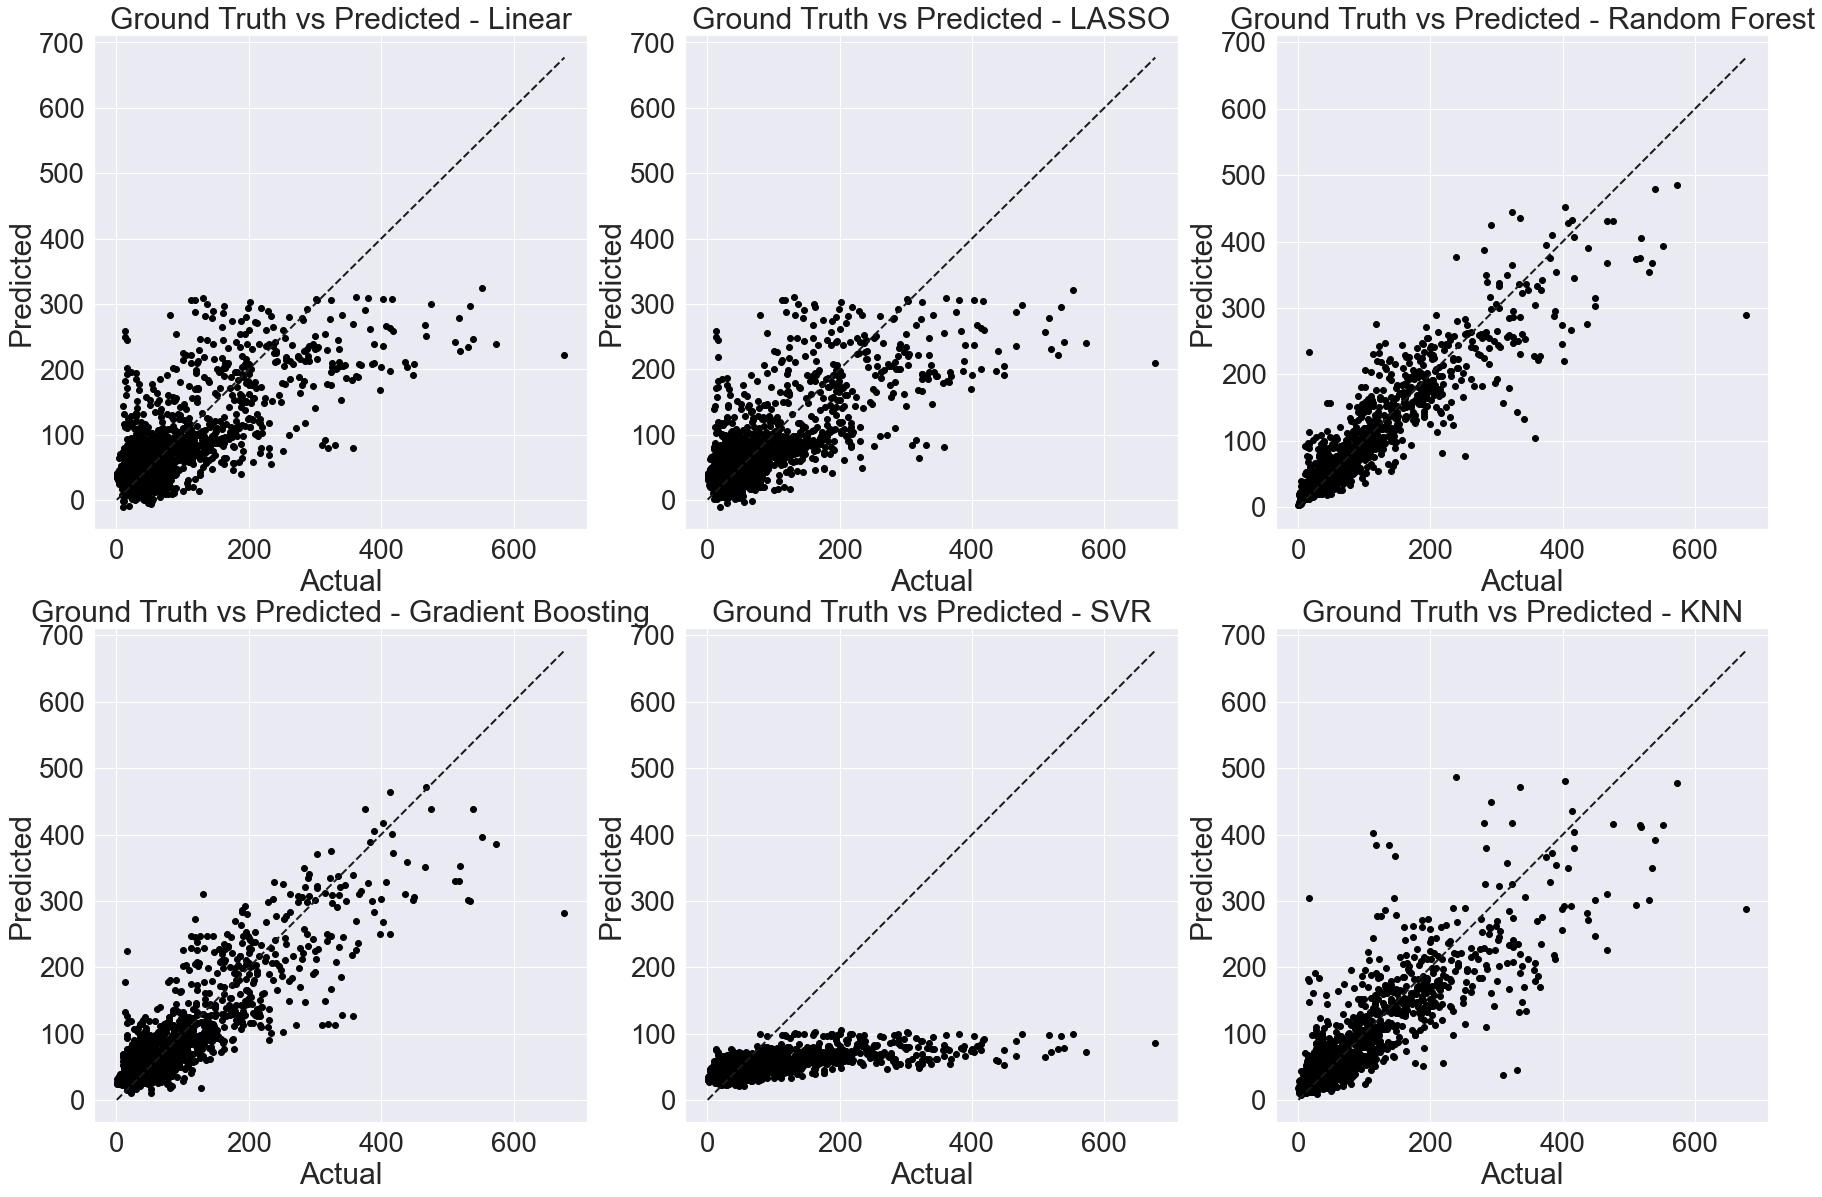

In [45]:
#Predicted values visualization
sns.set(font_scale=2.5)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30,20))

ax1.scatter(y_test, y_pred_lin, color='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Ground Truth vs Predicted - Linear')
ax1.set(xlabel='Actual', ylabel='Predicted')

ax2.scatter(y_test, y_pred_lasso, color='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ground Truth vs Predicted - LASSO')
ax2.set(xlabel='Actual', ylabel='Predicted')

ax3.scatter(y_test, y_pred_rf, color='black')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_title('Ground Truth vs Predicted - Random Forest')
ax3.set(xlabel='Actual', ylabel='Predicted')

ax4.scatter(y_test, y_pred_gbr, color='black')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_title('Ground Truth vs Predicted - Gradient Boosting')
ax4.set(xlabel='Actual', ylabel='Predicted')

ax5.scatter(y_test, y_pred_svr, color='black')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax5.set_title('Ground Truth vs Predicted - SVR')
ax5.set(xlabel='Actual', ylabel='Predicted')

ax6.scatter(y_test, y_pred_knn, color='black')
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax6.set_title('Ground Truth vs Predicted - KNN')
ax6.set(xlabel='Actual', ylabel='Predicted')


Compare the the two tables (all features vs top15 features).
Discuss the results

In [46]:
data = {'Metric':  ['MAE', 'MAE', 'MSE', 'MSE','RMSE','RMSE','R2','R2'],
        'Search': ['Default', 'Best 15 features','Default', 'Best 15 features',
                   'Default', 'Best 15 features','Default', 'Best 15 features'],
        'Linear Regression': [mae_lin,mae_new_lin,
                              mse_lin,mse_new_lin,
                              rmse_lin,rmse_new_lin,
                              r2_lin, r2_new_lin],
        'LASSO Regression': [mae_lasso,mae_new_lasso,
                             mse_lasso,mse_new_lasso,
                             rmse_lasso,rmse_new_lasso,
                             r2_lasso, r2_new_lasso],
        'Random Forest Regression': [mae_rf,mae_new_rf,
                                     mse_rf,mse_new_rf,
                                     rmse_rf,rmse_new_rf,
                                     r2_rf, r2_new_rf],
        'Gradient Boosting Regression': [mae_gbr,mae_new_gbr,
                                         mse_gbr,mse_new_gbr,
                                         rmse_gbr,rmse_new_gbr,
                                         r2_gbr, r2_new_gbr],
        'SVR Regression': [mae_svr,mae_new_svr,
                           mse_svr,mse_new_svr,
                           rmse_svr,rmse_new_svr,
                           r2_svr, r2_new_svr],
        'KNN Regression': [mae_knn,mae_new_knn,
                           mse_knn,mse_new_knn,
                           rmse_knn,rmse_new_knn,
                           r2_knn, r2_new_knn],
        'Dummy': [mae_dummy,mae_new_dummy,
                  mse_dummy,mse_new_dummy,
                  rmse_dummy,rmse_new_dummy,
                  r2_dummy, r2_new_dummy],
        }

comparison_default = pd.DataFrame (data, columns = ['Metric', 'Search',
                                                'Linear Regression', 'LASSO Regression', 
                                                'Random Forest Regression', 'Gradient Boosting Regression', 
                                                'SVR Regression', 'KNN Regression',
                                                'Dummy',
                                                ])
comparison_default

,Metric,Search,Linear Regression,LASSO Regression,Random Forest Regression,Gradient Boosting Regression,SVR Regression,KNN Regression,Dummy
0,MAE,Default,33.653411,33.531399,16.935008,23.644195,45.014143,22.528762,54.353344
1,MAE,Best 15 features,33.688951,33.701894,16.657883,23.461343,38.899227,21.951473,54.353344
2,MSE,Default,2731.983402,2787.953360,921.086310,1469.739793,7352.116157,1689.953105,6494.855184
3,MSE,Best 15 features,2785.501357,2835.828728,934.986056,1424.389913,5644.674950,1636.577327,6494.855184
4,RMSE,Default,52.268379,52.801073,30.349404,38.337186,85.744482,41.109039,80.590664
5,RMSE,Best 15 features,52.777849,53.252500,30.577542,37.741091,75.131052,40.454633,80.590664
6,R2,Default,0.579277,0.570658,0.858154,0.773662,-0.132219,0.739749,-0.000201
7,R2,Best 15 features,0.571036,0.563285,0.856013,0.780645,0.130726,0.747969,-0.000201


#### Comments:
Feature reduction has negligible positive impact on all metrics for all models. 

Default parameters for SVR still provide the worst results. It mainly fails to predict the high valueas of the targer variable.

Random Forest is still the best model for this dataset.

## 4. Hyperparameter Optimization

Use the dataset with the selected 15 features.

### 4.1 Random Search
Use Random Search CV to optimize the parameters for:
- LASSO regression
- Random Forest
- SVR

Use appropriate  n_iter, so that it ends in a reasonable time
 <br>Use CV = 3

Use Cross Validation for optimization, and the test set for final evaluation
<br> <b>DO NOT OPTIMIZE ON THE TEST SET </b>

Show the 2 comparison tables: 
- on the CV  
- on the test set

In [47]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
np.random.seed(seed=1)
from sklearn.model_selection import KFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

In [48]:
kf = KFold(n_splits=10, shuffle=True) #3-fold Cross validaiton - ALL Model - All scores
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

#### Grid for LASSO Regression

In [49]:
#Create the space of hyperparameter values
# Alpha constant
alpha = [x for x in np.linspace(start = 0.00001, stop = 3, num = 5000)]
# Intercept for this model
fit_intercept = [True, False]
#Tolerance
tolerance = [0.001, 0.0001, 0.00001]

random_search_lasso = {'alpha': alpha,
               'fit_intercept': fit_intercept,
                'tol': tolerance
               }

clf_lasso = linear_model.Lasso()

#### Grid for RandomForestRegressor

In [50]:
#Create the space of hyperparameter values
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 10, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_search_RFR = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf_rf = RandomForestRegressor()

#### Grid for SVR

In [51]:
#Create the space of hyperparameter values

# Kernel type
kernel = [ 'rbf', 'linear', 'sigmoid', 'poly'] #'precomputed'
# Regularization parameter C
C = [0.01, 1, 100, 1000] 
# Epsilon
epsilon = [0.01, 0.1, 1, 1.5] 

random_search_SVR = {'kernel': kernel,
                                   'C': C,
                                   'epsilon': epsilon
                                    }

clf_svr = SVR()

#### RandomizedSearchCV for ALL models

In [52]:
#create the LASSO model and train it 
model_lasso_RS = RandomizedSearchCV(estimator = clf_lasso, 
                           param_distributions = random_search_lasso, 
                           n_iter = 1000,
                           cv = 3,
                           verbose= 5,
                           random_state= 1, 
                           n_jobs = -1)
model_lasso_RS.fit(X_new, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


RandomizedSearchCV(cv=3, estimator=Lasso(), n_iter=1000, n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0006101180236047209,
                                                  0.0012102360472094418,
                                                  0.0018103540708141628,
                                                  0.0024104720944188836,
                                                  0.0030105901180236044,
                                                  0.0036107081416283256,
                                                  0.004210826165233046,
                                                  0.004810944188837767,
                                                  0.0054110622124424875,
                                                  0.006011180236047208,
                                                  0.006611298259651929,
                                                  0.0072114162...
                                                  0.01021200

In [53]:
#create the LASSO model and train it - CrossValidation
model_lasso_RSCV = RandomizedSearchCV(estimator = clf_lasso, 
                           param_distributions = random_search_lasso, 
                           n_iter = 1000, 
                           cv = kf,
                           verbose= 5,
                           random_state= 1, 
                           n_jobs = -1)
model_lasso_RSCV.fit(X_new, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=Lasso(), n_iter=1000, n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0006101180236047209,
                                                  0.0012102360472094418,
                                                  0.0018103540708141628,
                                                  0.0024104720944188836,
                                                  0.0030105901180236044,
                                                  0.0036107081416283256,
                                                  0.004210826165233046,
                                                  0.004810944188837767,
                                                  0.0054110622124424875,
                                                  0.0060...
                                                  0.010212006401280255,
                                                  0.01081212442488497

In [54]:
#create the RandomSearch model and train it 
model_rfr_RS = RandomizedSearchCV(estimator = clf_rf, 
                           param_distributions = random_search_RFR, 
                           n_iter = 100, 
                           cv = 3,
                           verbose= 5, 
                           random_state= 1, 
                           n_jobs = -1)
model_rfr_RS.fit(X_new, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 10, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 118, 136, 155,
                                                         173, 191, 210, 228,
                                                         246, 265, 283, 302,
                                                         320, 338, 357, 375,
                                                         393, 412, 430, 448,
        

In [55]:
#create the RandomSearch model and train it - CrossValidation
model_rfr_RSCV = RandomizedSearchCV(estimator = clf_rf, 
                           param_distributions = random_search_RFR, 
                           n_iter = 100, 
                           cv = kf, 
                           verbose= 5, 
                           random_state= 1, 
                           n_jobs = -1)
model_rfr_RSCV.fit(X_new, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 10, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 118, 136, 155,
                                                         173, 191, 210, 228,
                                                         246, 265, 283, 302,
                                                         320, 338, 357, 375,
                                   

In [56]:
#create the RandomSearch model and train it 
model_svr_RS = RandomizedSearchCV(estimator = clf_svr, 
                           param_distributions = random_search_SVR, 
                           n_iter = 50, 
                           cv = 3,
                           verbose= 5, 
                           random_state= 1, 
                           n_jobs = -1)
model_svr_RS.fit(X_new, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 1, 100, 1000],
                                        'epsilon': [0.01, 0.1, 1, 1.5],
                                        'kernel': ['rbf', 'linear', 'sigmoid',
                                                   'poly']},
                   random_state=1, verbose=5)

In [57]:
#create the RandomSearch model and train it - CrossValidation
model_svr_RSCV = RandomizedSearchCV(estimator = clf_svr, 
                           param_distributions = random_search_SVR, 
                           n_iter = 50, 
                           cv = kf, 
                           verbose= 5, 
                           random_state= 1, 
                           n_jobs = -1)
model_svr_RSCV.fit(X_new, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 1, 100, 1000],
                                        'epsilon': [0.01, 0.1, 1, 1.5],
                                        'kernel': ['rbf', 'linear', 'sigmoid',
                                                   'poly']},
                   random_state=1, verbose=5)

#### RandomizedSearchCV Metrics Comparison

In [58]:
#predictions 
y_LASSOpred_RS = model_lasso_RS.best_estimator_.predict(X_test_new)
y_LASSOpred_RSCV = model_lasso_RSCV.best_estimator_.predict(X_test_new)

y_RFpred_RS = model_rfr_RS.best_estimator_.predict(X_test_new)
y_RFpred_RSCV = model_rfr_RSCV.best_estimator_.predict(X_test_new)

y_SVRpred_RS = model_svr_RS.best_estimator_.predict(X_test_new)
y_SVRpred_RSCV = model_svr_RSCV.best_estimator_.predict(X_test_new)

#create Dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_new, y_train)
y_Dummy = dummy_regr.predict(X_test_new)


In [59]:
#Metrics
mae_LASSO_RS = mean_absolute_error(y_test, y_LASSOpred_RS)
mse_LASSO_RS = mean_squared_error(y_test, y_LASSOpred_RS)
rmse_LASSO_RS = np.sqrt(mean_squared_error(y_test, y_LASSOpred_RS))
r2_LASSO_RS = r2_score(y_test, y_LASSOpred_RS)

mae_LASSO_RSCV = mean_absolute_error(y_test, y_LASSOpred_RSCV)
mse_LASSO_RSCV = mean_squared_error(y_test, y_LASSOpred_RSCV)
rmse_LASSO_RSCV = np.sqrt(mean_squared_error(y_test, y_LASSOpred_RSCV))
r2_LASSO_RSCV = r2_score(y_test, y_LASSOpred_RSCV)

mae_RF_RS = mean_absolute_error(y_test, y_RFpred_RS)
mse_RF_RS = mean_squared_error(y_test, y_RFpred_RS)
rmse_RF_RS = np.sqrt(mean_squared_error(y_test, y_RFpred_RS))
r2_RF_RS = r2_score(y_test, y_RFpred_RS)

mae_RF_RSCV = mean_absolute_error(y_test, y_RFpred_RSCV)
mse_RF_RSCV = mean_squared_error(y_test, y_RFpred_RSCV)
rmse_RF_RSCV = np.sqrt(mean_squared_error(y_test, y_RFpred_RSCV))
r2_RF_RSCV = r2_score(y_test, y_RFpred_RSCV)

mae_SVR_RS = mean_absolute_error(y_test, y_SVRpred_RS)
mse_SVR_RS = mean_squared_error(y_test, y_SVRpred_RS)
rmse_SVR_RS = np.sqrt(mean_squared_error(y_test, y_SVRpred_RS))
r2_SVR_RS = r2_score(y_test, y_SVRpred_RS)

mae_SVR_RSCV = mean_absolute_error(y_test, y_SVRpred_RSCV)
mse_SVR_RSCV = mean_squared_error(y_test, y_SVRpred_RSCV)
rmse_SVR_RSCV = np.sqrt(mean_squared_error(y_test, y_SVRpred_RSCV))
r2_SVR_RSCV = r2_score(y_test, y_SVRpred_RSCV)


mae3 = mean_absolute_error(y_test, y_Dummy)
mse3 = mean_squared_error(y_test, y_Dummy)
rmse3 = np.sqrt(mean_squared_error(y_test, y_Dummy))
r23 = r2_score(y_test, y_Dummy)


In [60]:
#construct the comparison table
data = {'Metric':  ['MAE', 'MAE', 'MSE', 'MSE', 'RMSE', 'RMSE', 'R2', 'R2'],
        'Search': ['HyperRandomSearch', 'HyperRandomSearchCV', 
                      'HyperRandomSearch', 'HyperRandomSearchCV', 
                      'HyperRandomSearch', 'HyperRandomSearchCV', 
                       'HyperRandomSearch', 'HyperRandomSearchCV'],
        'LASSO Regression': [mae_LASSO_RS,mae_LASSO_RSCV,
                               mse_LASSO_RS,mse_LASSO_RSCV,
                               rmse_LASSO_RS,rmse_LASSO_RSCV,
                               r2_LASSO_RS, r2_LASSO_RSCV],
        'Random Forest Regression': [mae_RF_RS,mae_RF_RSCV,
                                     mse_RF_RS,mse_RF_RSCV,
                                     rmse_RF_RS,rmse_RF_RSCV,
                                     r2_RF_RS,r2_RF_RSCV],
        'SVR Regression': [mae_SVR_RS,mae_SVR_RSCV,
                           mse_SVR_RS,mse_SVR_RSCV,
                           rmse_SVR_RS,rmse_SVR_RSCV,
                           r2_SVR_RS,r2_SVR_RSCV],
        }
    

comparison_RS = pd.DataFrame (data, columns = ['Metric', 'Search',
                                               'LASSO Regression', 'Random Forest Regression', 'SVR Regression']
                                                )
                                               
comparison_RS

,Metric,Search,LASSO Regression,Random Forest Regression,SVR Regression
0,MAE,HyperRandomSearch,33.682124,16.346798,24.881638
1,MAE,HyperRandomSearchCV,33.686105,15.298669,24.881638
2,MSE,HyperRandomSearch,2785.942864,907.154739,2042.735777
3,MSE,HyperRandomSearchCV,2785.688893,890.943458,2042.735777
4,RMSE,HyperRandomSearch,52.782032,30.119010,45.196635
5,RMSE,HyperRandomSearchCV,52.779626,29.848676,45.196635
6,R2,HyperRandomSearch,0.570968,0.860299,0.685421
7,R2,HyperRandomSearchCV,0.571007,0.862796,0.685421


### 4.2 Halving Search

#### HalvingGridSearchCV for ALL models

In [76]:
# #create the HalvingGridSearchCV model for LASSO and train it - CrossValidation
# model_lasso_HGSCV = HalvingGridSearchCV(estimator = clf_lasso, 
#                            param_grid = random_search_lasso, 
# #                            resource='n_estimators',
#                            max_resources=1000,
#                            cv=10,
#                            random_state=1)
# model_lasso_HGSCV.fit(X_new, y_train)

In [77]:
# #create the HalvingGridSearchCV model for RandomForestRegressor and train it  - CrossValidation
# model_rfr_HGS_CV = HalvingGridSearchCV(estimator =clf_rf,
#                             param_grid = random_search_RFR,
# #                             resource='n_samples',
#                             max_resources=200,
#                             cv=10,
#                             random_state=1)
# model_rfr_HGS_CV.fit(X_new, y_train)


In [ ]:
# #create the HalvingGridSearchCV model for SVR and train it  - CrossValidation
# model_svr_HGS_CV = HalvingGridSearchCV(estimator =clf_svr,
#                             param_grid = random_search_SVR,
# #                             resource='n_samples',
#                             max_resources=50,
#                             cv=10,
#                             random_state=1)
# model_svr_HGS_CV.fit(X_new, y_train)


In [61]:
# #create the HalvingGridSearchCV model for LASSO and train it - On Test Dataset
# model_lasso_HGS = HalvingGridSearchCV(estimator = clf_lasso, 
#                            param_grid = random_search_lasso, 
# #                            resource='n_samples',
#                            max_resources=200,
#                            random_state=0)
# model_lasso_HGS.fit(X_new, y_train)

In [63]:
# #create the HalvingGridSearchCV model for RandomForestRegressor and train it - On Test Dataset
# model_rfr_HGS = HalvingGridSearchCV(estimator =clf_rf,
#                             param_grid = random_search_RFR,
# #                             resource='n_estimators',
#                             max_resources=200,
#                             random_state=0)
# model_rfr_HGS.fit(X_new, y_train)


In [65]:
# #create the HalvingGridSearchCV model for SVR and train it - On Test Dataset
# model_svr_HGS = HalvingGridSearchCV(estimator =clf_svr,
#                             param_grid = random_search_SVR,
# #                             resource='n_samples',
#                             max_resources=200,
#                             random_state=0)
# model_svr_HGS.fit(X_new, y_train)


#### HalvingGridSearchCV Metrics Comparison

In [67]:
# #predictions 
# y_LASSOpred_HGS = model_lasso_HGS.best_estimator_.predict(X_test_new)
# y_LASSOpred_HGSCV = model_lasso_HGSCV.best_estimator_.predict(X_test_new)

# y_RFpred_HGS = model_rfr_HGS.best_estimator_.predict(X_test_new)
# y_RFpred_HGSCV = model_rfr_HGSCV.best_estimator_.predict(X_test_new)

# y_SVRpred_HGS = model_svr_HGS.best_estimator_.predict(X_test_new)
# y_SVRpred_HGSCV = model_svr_HGSCV.best_estimator_.predict(X_test_new)

#create Dummy regressor
# dummy_regr = DummyRegressor(strategy="mean")
# dummy_regr.fit(X_new, y_train)
# y_Dummy = dummy_regr.predict(X_test_new)

In [68]:
# # Metrics
# mae_LASSO_HGS = mean_absolute_error(y_test, y_LASSOpred_HGS)
# mse_LASSO_HGS = mean_squared_error(y_test, y_LASSOpred_HGS)
# rmse_LASSO_HGS = np.sqrt(mean_squared_error(y_test, y_LASSOpred_HGS))
# r2_LASSO_HGS = r2_score(y_test, y_LASSOpred_HGS)

# mae_LASSO_HGSCV = mean_absolute_error(y_test, y_LASSOpred_HGSCV)
# mse_LASSO_HGSCV = mean_squared_error(y_test, y_LASSOpred_HGSCV)
# rmse_LASSO_HGSCV = np.sqrt(mean_squared_error(y_test, y_LASSOpred_HGSCV))
# r2_LASSO_HGSCV = r2_score(y_test, y_LASSOpred_HGSCV)

# mae_RF_HGS = mean_absolute_error(y_test, y_RFpred_HGS)
# mse_RF_HGS = mean_squared_error(y_test, y_RFpred_HGS)
# rmse_RF_HGS = np.sqrt(mean_squared_error(y_test, y_RFpred_HGS))
# r2_RF_HGS = r2_score(y_test, y_RFpred_HGS)

# mae_RF_HGSCV = mean_absolute_error(y_test, y_RFpred_HGSCV)
# mse_RF_HGSCV = mean_squared_error(y_test, y_RFpred_HGSCV)
# rmse_RF_HGSCV = np.sqrt(mean_squared_error(y_test, y_RFpred_HGSCV))
# r2_RF_HGSCV = r2_score(y_test, y_RFpred_HGSCV)

# mae_SVR_HGS = mean_absolute_error(y_test, y_SVRpred_HGS)
# mse_SVR_HGS = mean_squared_error(y_test, y_SVRpred_HGS)
# rmse_SVR_HGS = np.sqrt(mean_squared_error(y_test, y_SVRpred_HGS))
# r2_SVR_HGS = r2_score(y_test, y_SVRpred_HGS)

# mae_SVR_HGSCV = mean_absolute_error(y_test, y_SVRpred_HGSCV)
# mse_SVR_HGSCV = mean_squared_error(y_test, y_SVRpred_HGSCV)
# rmse_SVR_HGSCV = np.sqrt(mean_squared_error(y_test, y_SVRpred_HGSCV))
# r2_SVR_HGSCV = r2_score(y_test, y_SVRpred_HGSCV)


# mae3 = mean_absolute_error(y_test, y_Dummy)
# mse3 = mean_squared_error(y_test, y_Dummy)
# rmse3 = np.sqrt(mean_squared_error(y_test, y_Dummy))
# r23 = r2_score(y_test, y_Dummy)


# #construct the comparison table
# data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
#         'LASSO_Hyper_Halving': [mae_LASSO_HGS,mse_LASSO_HGS,rmse_LASSO_HGS,r2_LASSO_HGS],
#         'LASSO_Hyper_Halving_CV': [mae_LASSO_HGSCV,mse_LASSO_HGSCV,rmse_LASSO_HGSCV,r2_LASSO_HGSCV],
#         'RF_Hyper_Halving': [mae_RF_HGS,mse_RF_HGS,rmse_RF_HGS,r2_RF_HGS],
#         'RF_Hyper_Halving_CV': [mae_RF_HGSCV,mse_RF_HGSCV,rmse_RF_HGSCV,r2_RF_HGSCV],
#         'SVR_Hyper_Halving': [mae_SVR_HGS,mse_SVR_HGS,rmse_SVR_HGS,r2_SVR_HGS],
#         'SVR_Hyper_Halving_CV': [mae_SVR_HGSCV,mse_SVR_HGSCV,rmse_SVR_HGSCV,r2_SVR_HGSCV],
#         'Dummy': [mae3,mse3,rmse3,r23],
#         }

# comparison_HGS = pd.DataFrame (data, columns = ['Metric', 
#                                                'LASSO_Hyper_Halving', 
#                                                'LASSO_Hyper_Halving_CV', 
#                                                'RF_Hyper_Halving', 
#                                                'RF_Hyper_Halving_CV', 
#                                                'SVR_Hyper_Halving', 
#                                                'SVR_Hyper_Halving_CV'])#,
#                                                'Dummy'])
# comparison_HGS


In [69]:
# comparison_RS.merge(comparison_HGS, left_on=['Metric', 'Dummy'], right_on=['Metric', 'Dummy'])

## 5. SUMMARY

Visualize the errors (actual vs predicted) for the best 3 regressor

[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

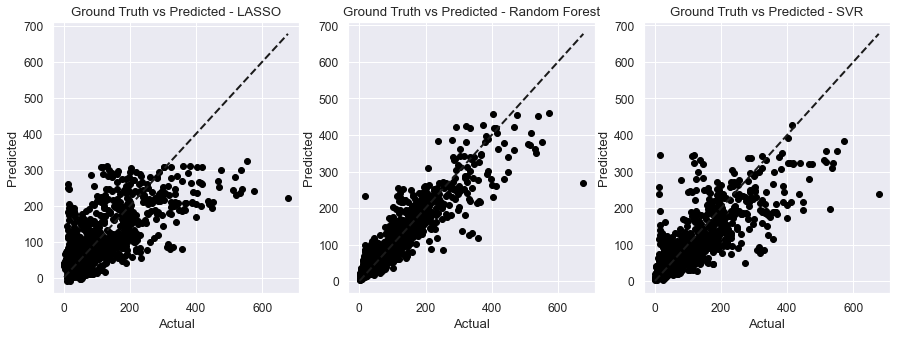

In [70]:
#Predicted values visualization
sns.set(font_scale=1.1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.scatter(y_test, y_LASSOpred_RS, color='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Ground Truth vs Predicted - LASSO')
ax1.set(xlabel='Actual', ylabel='Predicted')

ax2.scatter(y_test, y_RFpred_RS, color='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ground Truth vs Predicted - Random Forest')
ax2.set(xlabel='Actual', ylabel='Predicted')

ax3.scatter(y_test, y_SVRpred_RS, color='black')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_title('Ground Truth vs Predicted - SVR')
ax3.set(xlabel='Actual', ylabel='Predicted')


Summarize the results (MAE) for the following models in a single table:
- Random Forest - default parameters
- Random Forest - selected 15 features
- Random Forest - selected 15 features - optimized hyperparameters
- LASSO - default parameters
- LASSO - selected 15 features
- LASSO - selected 15 features - optimized hyperparameters
- SVR - default parameters
- SVR - selected 15 features
- SVR - selected 15 features - optimized hyperparameters
- Dummy regressor

In [78]:
#construct the comparison table
data = {'Metric':  ['MAE', 'MAE', 'MAE', 'MAE', 
#                     'MSE', 'MSE', 'MSE', 'MSE', 
#                     'RMSE', 'RMSE', 'RMSE', 'RMSE', 
                        'R2', 'R2', 'R2', 'R2'],
        'Search': ['Default', 'Best 15 features', 'HyperRandomSearch', 'HyperRandomSearchCV',
#                       'Default', 'Best 15 features', 'HyperRandomSearch', 'HyperRandomSearchCV', 
#                       'Default', 'Best 15 features', 'HyperRandomSearch', 'HyperRandomSearchCV', 
                      'Default', 'Best 15 features', 'HyperRandomSearch', 'HyperRandomSearchCV'],
        'LASSO Regression': [mae_lasso,mae_new_lasso,mae_LASSO_RS,mae_LASSO_RSCV,
#                                mse_lasso,mse_new_lasso,mse_LASSO_RS,mse_LASSO_RSCV,
#                                rmse_lasso,rmse_new_lasso,rmse_LASSO_RS,rmse_LASSO_RSCV,
                               r2_lasso, r2_new_lasso,r2_LASSO_RS, r2_LASSO_RSCV],
        'Random Forest Regression': [mae_rf,mae_new_rf,mae_RF_RS,mae_RF_RSCV,
#                                      mse_rf,mse_new_rf,mse_RF_RS,mse_RF_RSCV,
#                                      rmse_rf,rmse_new_rf,rmse_RF_RS,rmse_RF_RSCV,
                                     r2_rf, r2_new_rf,r2_RF_RS,r2_RF_RSCV],
        'SVR Regression': [mae_svr,mae_new_svr,mae_SVR_RS,mae_SVR_RSCV,
#                            mse_svr,mse_new_svr,mse_SVR_RS,mse_SVR_RSCV,
#                            rmse_svr,rmse_new_svr,rmse_SVR_RS,rmse_SVR_RSCV,
                           r2_svr, r2_new_svr,r2_SVR_RS,r2_SVR_RSCV],
                'Dummy': [mae_dummy,mae_new_dummy,'- / -', '- / -',
#                   mse_dummy,mse_new_dummy,'- / -', '- / -',
#                   rmse_dummy,rmse_new_dummy,'- / -', '- / -',
                  r2_dummy, r2_new_dummy,'- / -', '- / -']

        }
    

comparison_3 = pd.DataFrame (data, columns = ['Metric', 'Search',
                                               'LASSO Regression', 'Random Forest Regression', 
                                              'SVR Regression', 'Dummy']
                                                )
                                               
comparison_3

,Metric,Search,LASSO Regression,Random Forest Regression,SVR Regression,Dummy
0,MAE,Default,33.531399,16.935008,45.014143,54.353344
1,MAE,Best 15 features,33.701894,16.657883,38.899227,54.353344
2,MAE,HyperRandomSearch,33.682124,16.346798,24.881638,- / -
3,MAE,HyperRandomSearchCV,33.686105,15.298669,24.881638,- / -
4,R2,Default,0.570658,0.858154,-0.132219,-0.000201
5,R2,Best 15 features,0.563285,0.856013,0.130726,-0.000201
6,R2,HyperRandomSearch,0.570968,0.860299,0.685421,- / -
7,R2,HyperRandomSearchCV,0.571007,0.862796,0.685421,- / -


#### Comments:
Hyper parameters randomized search resulted in finding better paramteres for SVR model, resulting in significant improvement of MAE and R2.

For the other two models, randomized search slightly improved the results.

Random Forest predicts the PM10 concentration most accuratelly.